# Домашнее задание: модели классификации и оценка их качества.

Будем тренироваться обучать модели классификации и интерпретировать их качество.

Максимальный балл за задание 10 баллов

## Часть 1. Обучение моделей классификации (5 баллов). 

Поработайте с датасетом telecom_churn. Вам предстоит по характеристикам клиента предсказать, уйдет он или нет (целевая колонка - Churn). Каждый пункт задания весит 1 балл, если вы не ответили на какой-то вопрос, снимается 1/10 балла.

A . Решите задачу с помощью логистической регрессии:
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

B. Решите задачу с помощью метода опорных векторов (с kernel = 'linear'):
- подберите значение гиперпараметров с помощью GridSearchCV
Что вы можете сказать об алгоритме? Он переобучился/недообучился/обучился как надо и вы довольны качеством?

Не забудьте масштабировать данные перед применением линейных моделей.

C. Попробуйте увеличить число признаков с помощью добавления полиномиальных признаков. Также можно добавить функции от признаков вручную (те, которые вам кажутся подходящими в данной задаче).
Улучшилось ли качество алгоритма?

D. Постройте матрицу корреляций признаков. Есть ли признаки, которые практически не коррелируют с целевой переменной? Попробуйте их удалить. Есть ли пары сильно коррелирующих между собой признаков? Удалите по одному признаку из каждой пары.
Помогло ли это улучшить качество в данной задаче?

Пункты C и D можно скомбинировать для достижения наилучшего качества.

E. Сделайте мини-отчет о проведенной работе. Для этого ответьте на вопросы:
a) какой классификатор дал наилучший результат? чему равны значения метрик accuracy, f1-score и ROC-AUC? 
(Вы можете изначально разбить данные на train и test и сравнивать значения метрик на этих выборках; или же можно оценивать качество алгоритмов по кросс-валидации).

b) какие новые признаки вы добавили и какие признаки удалили?

c) удалось ли добиться того, что алгоритм не переобучился и не недообучился?

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

%matplotlib inline

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
data = pd.read_csv('telecom_churn.csv')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [93]:
# А - Логистическая регрессия:

X = data.drop(columns=['Churn'])
y = data['Churn']

X = pd.DataFrame(X)

categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression())
])

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 200, 500]
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

train_accuracy = best_model.score(X_train, y_train)
test_accuracy = best_model.score(X_test, y_test)
classification_rep = classification_report(y_test, y_pred_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)

print(f'Accuracy модели на обучающей выборке: {train_accuracy}')
print(f'Accuracy модели на тестовой выборке: {test_accuracy}')
print(f'Наилучшие гиперпараметры: {grid_search.best_params_}')

Accuracy модели на обучающей выборке: 0.8690922730682671
Accuracy модели на тестовой выборке: 0.848575712143928
Наилучшие гиперпараметры: {'classifier__C': 0.1, 'classifier__max_iter': 100, 'classifier__solver': 'liblinear'}


**ОТЧЕТ**

Разница между точностью на обучающей и тестовой выборках составляет около 2%, что говорит о том, что модель не переобучилась (нет значительного снижения точности на тестовых данных) и не недообучилась (точность на обучающей выборке достаточно высока).

Но стоит отметить, что 84.9% это все еще не очень высокий показатель, его можно улучшить.

In [94]:
# B - метод опорных векторов:

pipeline_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', SVC(kernel='linear'))
])

param_grid_svc = {
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}

grid_search_svc = GridSearchCV(pipeline_svc, param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train, y_train)

best_model_svc = grid_search_svc.best_estimator_
y_pred_train_svc = best_model_svc.predict(X_train)
y_pred_test_svc = best_model_svc.predict(X_test)

train_accuracy_svc = best_model_svc.score(X_train, y_train)
test_accuracy_svc = best_model_svc.score(X_test, y_test)
classification_rep_svc = classification_report(y_test, y_pred_test_svc)
conf_matrix_svc = confusion_matrix(y_test, y_pred_test_svc)

print(f'Accuracy модели на обучающей выборке: {train_accuracy_svc}')
print(f'Accuracy модели на тестовой выборке: {test_accuracy_svc}')
print(f'Наилучшие гиперпараметры: {grid_search_svc.best_params_}')

Accuracy модели на обучающей выборке: 0.8567141785446362
Accuracy модели на тестовой выборке: 0.848575712143928
Наилучшие гиперпараметры: {'classifier__C': 0.1}


**ОТЧЕТ**

Разница в точности между обучающей и тестовой выборками составляет менее 1%, что свидетельствует о хорошей обобщающей способности модели.

Модель не показывает признаков переобучения, так как точность на тестовой выборке незначительно ниже, что является нормальным.

Точность на тестовой выборке сопоставима с результатами, полученными с помощью логистической регрессии. Это говорит о том, что модель метода опорных векторов с линейным ядром подходит для данной задачи, но значительного улучшения качества по сравнению с логистической регрессией не наблюдается.

In [95]:
# C - полиномиальные признаки:

pipeline_svc_poly = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('poly_features', PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', SVC(kernel='linear'))
])

param_grid_svc_poly = {
    'classifier__C': [0.01, 0.1, 1, 10, 100]
}

grid_search_svc_poly = GridSearchCV(pipeline_svc_poly, param_grid_svc_poly, cv=5, scoring='accuracy')
grid_search_svc_poly.fit(X_train, y_train)

best_model_svc_poly = grid_search_svc_poly.best_estimator_
y_pred_train_svc_poly = best_model_svc_poly.predict(X_train)
y_pred_test_svc_poly = best_model_svc_poly.predict(X_test)

train_accuracy_svc_poly = best_model_svc_poly.score(X_train, y_train)
test_accuracy_svc_poly = best_model_svc_poly.score(X_test, y_test)
classification_rep_svc_poly = classification_report(y_test, y_pred_test_svc_poly)
conf_matrix_svc_poly = confusion_matrix(y_test, y_pred_test_svc_poly)

print(f'Accuracy модели на обучающей выборке: {train_accuracy_svc_poly}')
print(f'Accuracy модели на тестовой выборке: {test_accuracy_svc_poly}')
print(f'Наилучшие гиперпараметры: {grid_search_svc_poly.best_params_}')

Accuracy модели на обучающей выборке: 0.9321080270067517
Accuracy модели на тестовой выборке: 0.8680659670164917
Наилучшие гиперпараметры: {'classifier__C': 0.01}


**ОТЧЕТ**

Как мы можем заметить, точность на обучающей выборке значительно возросла (с 85.7% до 93.2%). Это указывает на то, что добавление полиномиальных признаков дало модели больше возможностей для подгонки под данные.

Точность на тестовой выборке также улучшилась, хоть и не столь значительно.

Однако важно отметить, что довольно большая разница между точностью на обучающей и тестовой выборках (около 6.4%) может быть признаком некоторого переобучения.

In [116]:
# D - избыточные признаки:

X_test_poly = poly.transform(X_test)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly.get_feature_names_out(X_test.columns))

X_test_poly_df.drop(columns=low_corr_features, inplace=True)

for (feat1, feat2) in high_corr_pairs:
    if feat1 in X_test_poly_df.columns and feat2 in X_test_poly_df.columns:
        X_test_poly_df.drop(columns=[feat2], inplace=True)

X_train_filtered = X_poly_df.drop(columns=['Target'])
X_test_filtered = X_test_poly_df

pipeline_svc_poly_filtered = Pipeline(steps=[
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', SVC(kernel='linear'))
])

grid_search_svc_poly_filtered = GridSearchCV(pipeline_svc_poly_filtered, param_grid_svc_poly, cv=5, scoring='accuracy')
grid_search_svc_poly_filtered.fit(X_train_filtered, y_train)

best_model_svc_poly_filtered = grid_search_svc_poly_filtered.best_estimator_
train_accuracy_filtered = best_model_svc_poly_filtered.score(X_train_filtered, y_train)
test_accuracy_filtered = best_model_svc_poly_filtered.score(X_test_filtered, y_test)
classification_rep_filtered = classification_report(y_test, best_model_svc_poly_filtered.predict(X_test_filtered))

print(f'Accuracy модели на обучающей выборке после отбора признаков: {train_accuracy_filtered}')
print(f'Accuracy модели на тестовой выборке после отбора признаков: {test_accuracy_filtered}')
print(f'Наилучшие гиперпараметры после отбора признаков: {grid_search_svc_poly_filtered.best_params_}')
print()
print(f'Отчет по классификации:\n{classification_rep_filtered}')

Accuracy модели на обучающей выборке после отбора признаков: 0.8609958506224067
Accuracy модели на тестовой выборке после отбора признаков: 0.855072463768116
Наилучшие гиперпараметры после отбора признаков: {'classifier__C': 0.01}

Отчет по классификации:
              precision    recall  f1-score   support

           0       0.97      0.78      0.87       124
           1       0.75      0.96      0.84        83

    accuracy                           0.86       207
   macro avg       0.86      0.87      0.85       207
weighted avg       0.88      0.86      0.86       207



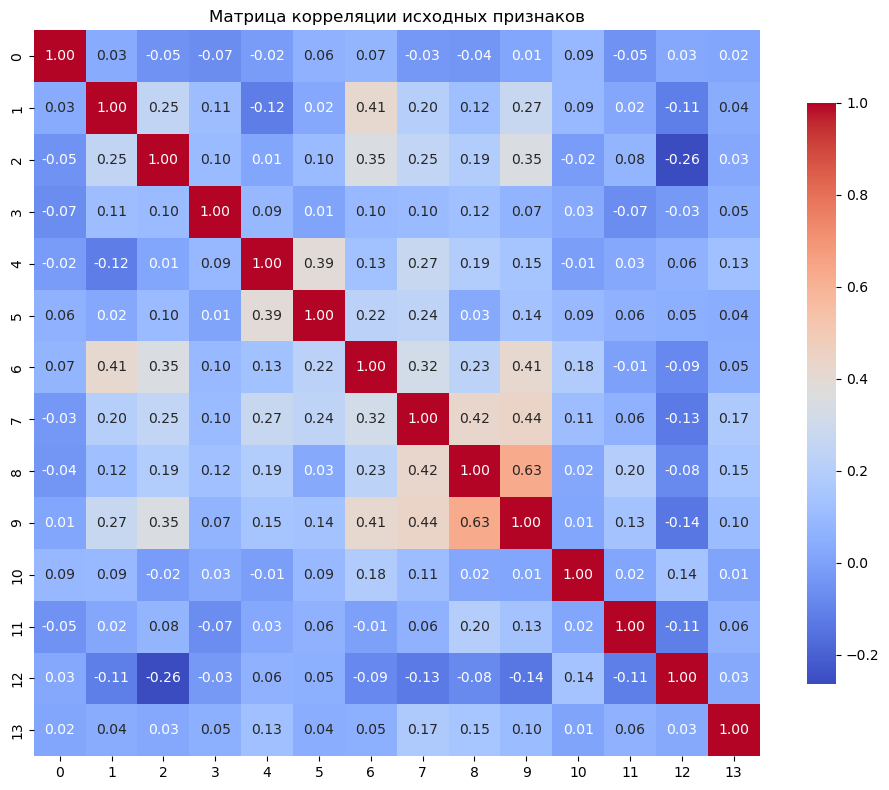

In [120]:
# D - матрица корреляции признаков:

plt.figure(figsize=(10, 8))
sns.heatmap(X_train.corr(), cmap='coolwarm', annot=True, fmt=".2f", square=True, cbar_kws={"shrink": 0.8})
plt.title("Матрица корреляции исходных признаков")
plt.tight_layout()
plt.show()

**ОТЧЕТ**

Удаление некоррелирующих признаков не помогло значительно улулчшить качество в рамках данной задачи.

Разрыв между точностью предсказаний на обучающей и тестовой выборках сократился, что хорошо - модель теперь не настолько переобучена, но в то же время accuracy на тестовой выборке снизился, хоть и не столь значительно.

In [132]:
# E - анализ проделанной работы:


# Логистическая регрессия:

y_pred_proba_log_reg = best_model.predict_proba(X_test)[:, 1]
f1_log_reg = f1_score(y_test, y_pred_test)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg)

print("Логистическая регрессия:")
print()
print(f"F1-score: {f1_log_reg}")
print(f"ROC-AUC: {roc_auc_log_reg}")
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

# Метод опорных векторов:

y_pred_proba_svc = best_model_svc.decision_function(X_test)
f1_svc = f1_score(y_test, y_pred_test_svc)
roc_auc_svc = roc_auc_score(y_test, y_pred_proba_svc)

print("\nМетод опорных векторов (SVC):")
print()
print(f"F1-score: {f1_svc}")
print(f"ROC-AUC: {roc_auc_svc}")
print(classification_report(y_test, y_pred_test_svc))
print(confusion_matrix(y_test, y_pred_test_svc))

# Метод опорных векторов с полиномиальными признаками:

y_pred_proba_svc_poly = best_model_svc_poly.decision_function(X_test)
f1_svc_poly = f1_score(y_test, y_pred_test_svc_poly)
roc_auc_svc_poly = roc_auc_score(y_test, y_pred_proba_svc_poly)

print("\nМетод опорных векторов с полиномиальными признаками:")
print()
print(f"F1-score: {f1_svc_poly}")
print(f"ROC-AUC: {roc_auc_svc_poly}")
print(classification_report(y_test, y_pred_test_svc_poly))
print(confusion_matrix(y_test, y_pred_test_svc_poly))

Логистическая регрессия:

F1-score: 0.24060150375939848
ROC-AUC: 0.8135255221635238
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       566
           1       0.50      0.16      0.24       101

    accuracy                           0.85       667
   macro avg       0.68      0.57      0.58       667
weighted avg       0.81      0.85      0.81       667

[[550  16]
 [ 85  16]]

Метод опорных векторов (SVC):

F1-score: 0.0
ROC-AUC: 0.7614141272784523
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       566
           1       0.00      0.00      0.00       101

    accuracy                           0.85       667
   macro avg       0.42      0.50      0.46       667
weighted avg       0.72      0.85      0.78       667

[[566   0]
 [101   0]]

Метод опорных векторов с полиномиальными признаками:

F1-score: 0.40540540540540543
ROC-AUC: 0.8518524997376064
              precision    re

**ОТЧЕТ**

Наилучший результат показал классификатор с добавлением полиномиальных признаков. Этот классификатор продемонстрировал наилучший баланс между метриками на обучающей и тестовой выборках, а также наиболее высокий F1-score и ROC-AUC, что говорит о лучшей способности модели различать классы и работать с положительными примерами.

Судя по результатам, наилучшего баланса удалось достичь с моделью, использующей полиномиальные признаки:

1. Accuracy на обучающей и тестовой выборках близки (0.9321 и 0.8681 соответственно), что говорит о хорошем обобщении модели и отсутствии значительного переобучения;
2. Значение F1-score также улучшилось, что подтверждает лучшее качество предсказаний на положительном классе.

## Часть 2. Оценка качества моделей классификации (5 баллов).

В этой части вы будете работать с данными в задаче скоринга. За работу с этими данными можно получить **5 баллов.**

* Колонки 0, 1, ..., 13 - анонимизированные характеристики клиентов (некоторые числовые, некоторые категориальные). 
* Target - целевая переменная: 1 - выдать кредит, 0 - не выдать кредит.

На этих данных было обучено три различных алгоритма классификации и получены предсказания:
* pred1_probs - предсказанные вероятности положительного класса, полученные алгоритмом 1.
* pred1_classes - предсказанные алгоритмом 1 классы
* pred2_probs, pred2_classes, pred3_probs, pred3_classes - аналогичные величины для алгоритмов 2 и 3

Наша задача - оценить качество каждого из трех алгоритмов и разобраться, какой из алгоритмов лучше всего работает в данной задаче.

In [137]:
data = pd.read_csv("credit_scoring_example.csv")
data.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,target,pred1_probs,pred1_classes,pred2_probs,pred2_classes,pred3_probs,pred3_classes
0,1,22.08,11.46,2,4,4,1.585,0,0,0,...,2,100,1213,0,0.506772,1,0.610853,1,0.375494,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,...,2,160,1,0,0.358519,0,0.185941,0,0.200975,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,...,2,280,1,0,0.358753,0,0.523009,1,0.160465,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,...,2,0,1,1,0.408729,0,0.185941,0,0.357771,0
4,1,20.17,8.17,2,6,4,1.960,1,1,14,...,2,60,159,1,0.480904,0,0.526646,1,0.260169,0


**Задание 1. (0.25  баллов)** Проверьте target на сбалансированность по классам, сделайте вывод.

In [138]:
target_counts = data['target'].value_counts(normalize=True)

target_counts

print(f'Класс 0 (не выдавать кредит): {round(target_counts[0], 2)}')
print(f'Класс 1 (выдавать кредит): {round(target_counts[1], 2)}')

Класс 0 (не выдавать кредит): 0.55
Класс 1 (выдавать кредит): 0.45


**Вывод:**

Распределение классов не является строго сбалансированным, но перекос в сторону нулевого класса незначительный.

Тем не менее, для задач классификации это следует учитывать, так как метрики могут быть чувствительны к несбалансированным данным.

**Задание 2. (0.25  баллов)** Вычислите accuracy - долю правильных ответов каждого из алгоритмов. Какой алгоритм имеет наибольшую accuracy?

In [139]:
accuracy_pred1 = accuracy_score(data['target'], data['pred1_classes'])
accuracy_pred2 = accuracy_score(data['target'], data['pred2_classes'])
accuracy_pred3 = accuracy_score(data['target'], data['pred3_classes'])

accuracy_scores = {
    'Алгоритм 1': accuracy_pred1,
    'Алгоритм 2': accuracy_pred2,
    'Алгоритм 3': accuracy_pred3
}
best_algorithm = max(accuracy_scores, key=accuracy_scores.get)

print(f"Accuracy алгоритма 1: {accuracy_pred1:.4f}")
print(f"Accuracy алгоритма 2: {accuracy_pred2:.4f}")
print(f"Accuracy алгоритма 3: {accuracy_pred3:.4f}")
print()
print(f"Алгоритм с наивысшей точностью: {best_algorithm} с accuracy {accuracy_scores[best_algorithm]:.2f}")

Accuracy алгоритма 1: 0.6618
Accuracy алгоритма 2: 0.6720
Accuracy алгоритма 3: 0.6401

Алгоритм с наивысшей точностью: Алгоритм 2 с accuracy 0.67


**Задание 3. (0.25  баллов)** Теперь вычислите точность и полноту каждого из алгоритмов.

In [140]:
precision_pred1 = precision_score(data['target'], data['pred1_classes'])
recall_pred1 = recall_score(data['target'], data['pred1_classes'])

precision_pred2 = precision_score(data['target'], data['pred2_classes'])
recall_pred2 = recall_score(data['target'], data['pred2_classes'])

precision_pred3 = precision_score(data['target'], data['pred3_classes'])
recall_pred3 = recall_score(data['target'], data['pred3_classes'])

print(f"Алгоритм 1 - Precision: {precision_pred1:.4f} - Recall: {recall_pred1:.4f}")
print(f"Алгоритм 2 - Precision: {precision_pred2:.4f} - Recall: {recall_pred2:.4f}")
print(f"Алгоритм 3 - Precision: {precision_pred3:.4f} - Recall: {recall_pred3:.4f}")

Алгоритм 1 - Precision: 0.6907 - Recall: 0.4365
Алгоритм 2 - Precision: 0.6104 - Recall: 0.7296
Алгоритм 3 - Precision: 0.6903 - Recall: 0.3485


Самым полезным инструментом в практических задачах является ***матрица ошибок***. Смотря на неё и регулируя порог, определяющий классы, мы можем достичь оптимального решения нашей задачи.

**Задание 4. (0.25  баллов)** Используя функцию plot_confusion_matrix для визуализации матрицы ошибок, нарисуйте матрицы ошибок всех трех алгоритмов.

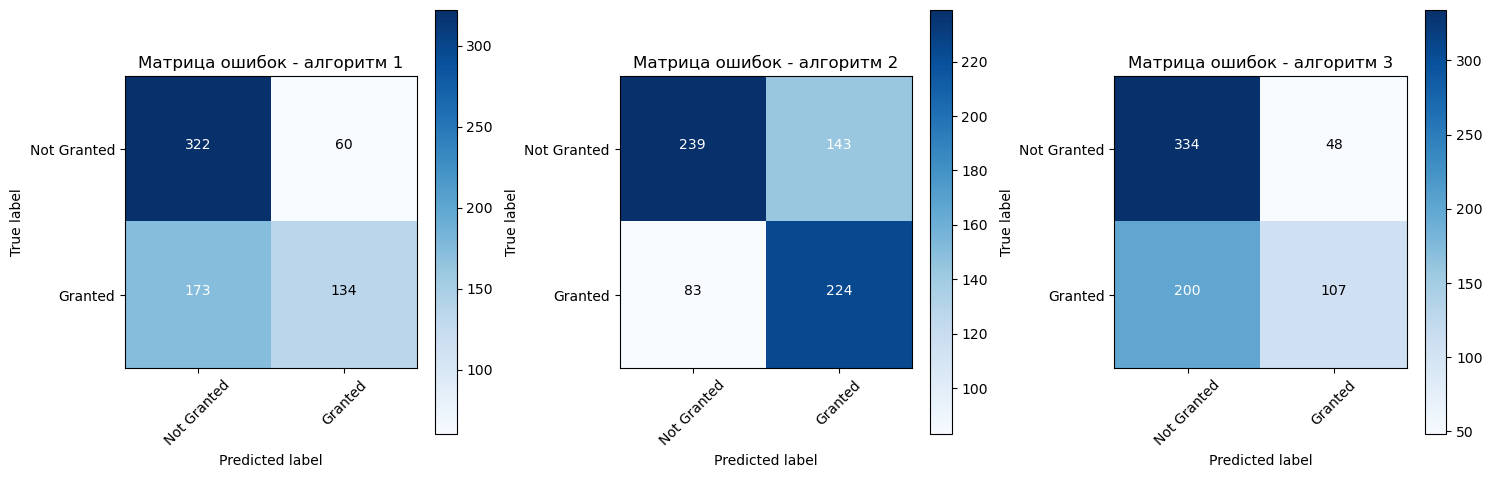

In [141]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Матрица ошибок', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm_pred1 = confusion_matrix(data['target'], data['pred1_classes'])
cm_pred2 = confusion_matrix(data['target'], data['pred2_classes'])
cm_pred3 = confusion_matrix(data['target'], data['pred3_classes'])

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_confusion_matrix(cm_pred1, classes=['Not Granted', 'Granted'], title='Матрица ошибок - алгоритм 1')

plt.subplot(1, 3, 2)
plot_confusion_matrix(cm_pred2, classes=['Not Granted', 'Granted'], title='Матрица ошибок - алгоритм 2')

plt.subplot(1, 3, 3)
plot_confusion_matrix(cm_pred3, classes=['Not Granted', 'Granted'], title='Матрица ошибок - алгоритм 3')

plt.show()

Давайте определимся с целями нашего предсказания:
    
* **Вариант 1**: хотим выдать кредит максимальному числу людей среди тех, кто мог бы его вернуть. При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того полнота должна быть как можно больше (число в левом нижнем квадрате матрицы ошибок минимально).

**Задание 5. (1  балл)** Для каждого алгоритма найдите такой порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной полноты можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65?

**Комментарий:** порог можно искать в цикле с небольшим шагом.

In [142]:
thresholds = np.arange(0.0, 1.01, 0.01)

def calculate_metrics(probs, target, threshold):
    predictions = (probs >= threshold).astype(int)
    accuracy = accuracy_score(target, predictions)
    recall = recall_score(target, predictions)
    return accuracy, recall

best_thresholds = {}
best_recalls = {}

for i, probs_column in enumerate(['pred1_probs', 'pred2_probs', 'pred3_probs'], start=1):
    max_recall = 0
    best_thresh = 0
    
    for threshold in thresholds:
        accuracy, recall = calculate_metrics(data[probs_column], data['target'], threshold)
        
        if accuracy >= 0.65 and recall > max_recall:
            max_recall = recall
            best_thresh = threshold
    
    best_thresholds[f'Алгоритм {i}'] = best_thresh
    best_recalls[f'Алгоритм {i}'] = max_recall

print(f'Лучшие пороги принятия решения: {best_thresholds}')
print(f'Максимальная полнота: {best_recalls}')

Лучшие пороги принятия решения: {'Алгоритм 1': 0.36, 'Алгоритм 2': 0.27, 'Алгоритм 3': 0}
Максимальная полнота: {'Алгоритм 1': 0.742671009771987, 'Алгоритм 2': 0.8371335504885994, 'Алгоритм 3': 0}


**Задание 6. (0.25  баллов)** Визуализируйте матрицу ошибок для каждого из трех алгоритмов с подобранным порогом.

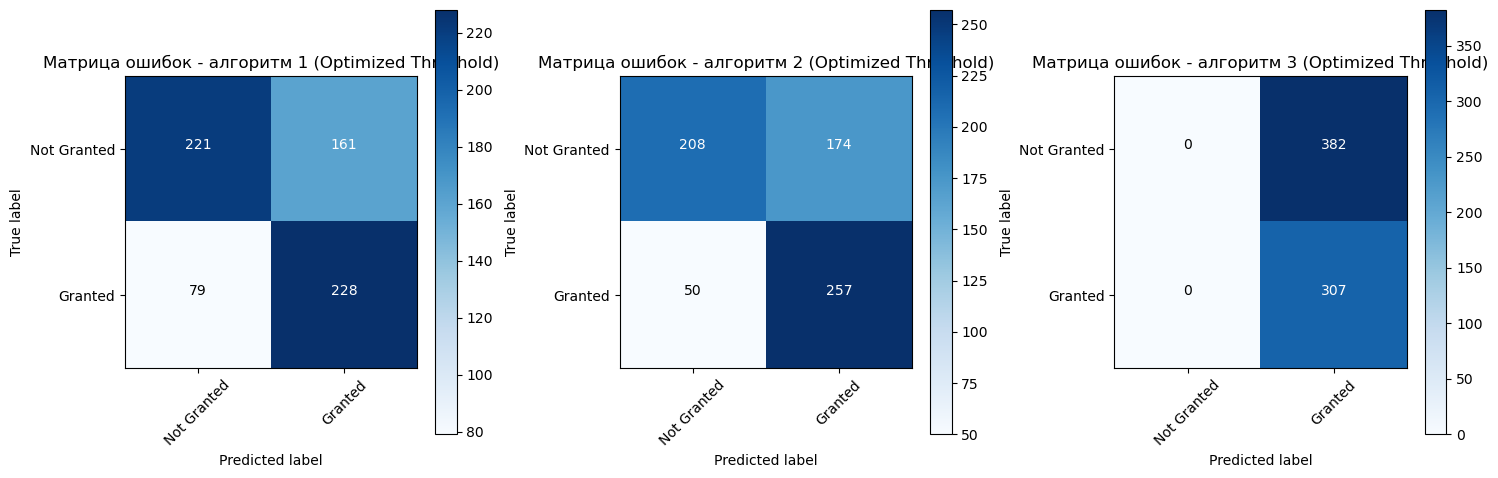

In [143]:
optimal_predictions_1 = (data['pred1_probs'] >= best_thresholds['Алгоритм 1']).astype(int)
optimal_predictions_2 = (data['pred2_probs'] >= best_thresholds['Алгоритм 2']).astype(int)
optimal_predictions_3 = (data['pred3_probs'] >= best_thresholds['Алгоритм 3']).astype(int)

cm_optimal_pred1 = confusion_matrix(data['target'], optimal_predictions_1)
cm_optimal_pred2 = confusion_matrix(data['target'], optimal_predictions_2)
cm_optimal_pred3 = confusion_matrix(data['target'], optimal_predictions_3)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_confusion_matrix(cm_optimal_pred1, classes=['Not Granted', 'Granted'], title='Матрица ошибок - алгоритм 1 (Optimized Threshold)')

plt.subplot(1, 3, 2)
plot_confusion_matrix(cm_optimal_pred2, classes=['Not Granted', 'Granted'], title='Матрица ошибок - алгоритм 2 (Optimized Threshold)')

plt.subplot(1, 3, 3)
plot_confusion_matrix(cm_optimal_pred3, classes=['Not Granted', 'Granted'], title='Матрица ошибок - алгоритм 3 (Optimized Threshold)')

plt.show()

Наша цель может звучать и по-другому:
    
* **Вариант 2**: среди тех, кому модель выдает кредит, должно быть меньше всего ошибок (мало людей, кто его на самом деле не вернет - на них будем терять деньги). 
    При этом не хотим много ошибаться (общее число ошибок не более 35%).
  
1) Мы не хотим, чтобы алгоритм много ошибался: accuracy $\geq$ 0.65.

2) Кроме того точность должна быть как можно больше (число в правом верхнем квадрате матрицы ошибок минимально).

**Задание 7. (0.75  баллов)** Для каждого алгоритма найдите порог принятия решения, чтобы выполнялись перечисленные выше условия. Какой максимальной точности можно добиться у каждой из моделей при условии, что accuracy $\geq$ 0.65? 

In [146]:
def calculate_precision_metrics(probs, target, threshold):
    predictions = (probs >= threshold).astype(int)
    accuracy = accuracy_score(target, predictions)
    precision = precision_score(target, predictions)
    return accuracy, precision

best_thresholds_precision = {}
best_precisions = {}

for i, probs_column in enumerate(['pred1_probs', 'pred2_probs', 'pred3_probs'], start=1):
    max_precision = 0
    best_thresh = 0
    
    for threshold in thresholds:
        accuracy, precision = calculate_precision_metrics(data[probs_column], data['target'], threshold)
        
        if accuracy >= 0.65 and precision > max_precision:
            max_precision = precision
            best_thresh = threshold
    
    best_thresholds_precision[f'Алгоритм {i}'] = best_thresh
    best_precisions[f'Алгоритм {i}'] = max_precision

best_thresholds_precision, best_precisions

print(f'Лучшие пороги принятия решения: {best_thresholds}')
print(f'Максимальная полнота: {best_precisions}')

Лучшие пороги принятия решения: {'Алгоритм 1': 0.36, 'Алгоритм 2': 0.27, 'Алгоритм 3': 0}
Максимальная полнота: {'Алгоритм 1': 0.7371794871794872, 'Алгоритм 2': 0.8367346938775511, 'Алгоритм 3': 0}


**Задание 8. (0.5  баллов)** Нарисуйте матрицы ошибок для каждого из алгоритмов с найденными значениями порога. Какая модель лучше всех справилась с этой задачей?

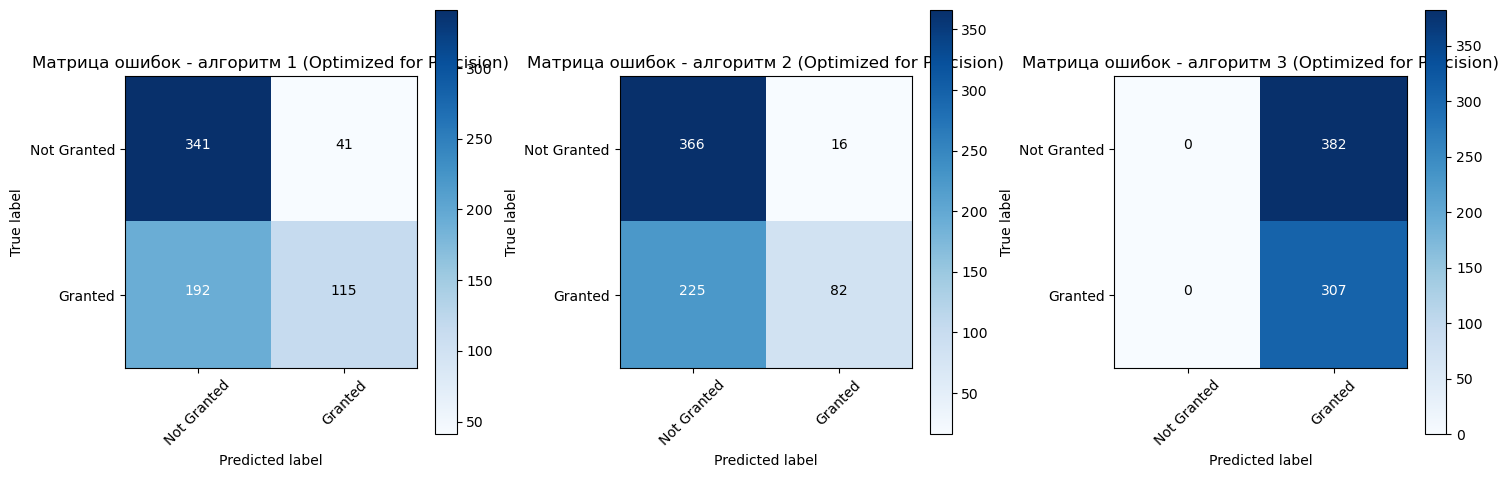

In [147]:
optimal_precision_predictions_1 = (data['pred1_probs'] >= best_thresholds_precision['Алгоритм 1']).astype(int)
optimal_precision_predictions_2 = (data['pred2_probs'] >= best_thresholds_precision['Алгоритм 2']).astype(int)
optimal_precision_predictions_3 = (data['pred3_probs'] >= best_thresholds_precision['Алгоритм 3']).astype(int)

cm_optimal_precision_pred1 = confusion_matrix(data['target'], optimal_precision_predictions_1)
cm_optimal_precision_pred2 = confusion_matrix(data['target'], optimal_precision_predictions_2)
cm_optimal_precision_pred3 = confusion_matrix(data['target'], optimal_precision_predictions_3)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_confusion_matrix(cm_optimal_precision_pred1, classes=['Not Granted', 'Granted'], title='Матрица ошибок - алгоритм 1 (Optimized for Precision)')

plt.subplot(1, 3, 2)
plot_confusion_matrix(cm_optimal_precision_pred2, classes=['Not Granted', 'Granted'], title='Матрица ошибок - алгоритм 2 (Optimized for Precision)')

plt.subplot(1, 3, 3)
plot_confusion_matrix(cm_optimal_precision_pred3, classes=['Not Granted', 'Granted'], title='Матрица ошибок - алгоритм 3 (Optimized for Precision)')

plt.show()

**Вывод:**
Лучше всего с задачей справился второй алгоритм, точность высока.

Также (**Вариант 3**) можно потребовать, чтобы и точность, и полнота были высокими, то есть обе ошибки в матрице ошибок были маленькие. Как вариант - можно максимизировать F1-score (среднее гармоническое между точностью и полнотой).

**Задание 9. (0.5  баллов)** Найдите пороги для достижения максимального F1-score для каждой из трех моделей и нарисуйте матрицы ошибок. Какая модель решает поставленную задачу лучше остальных?

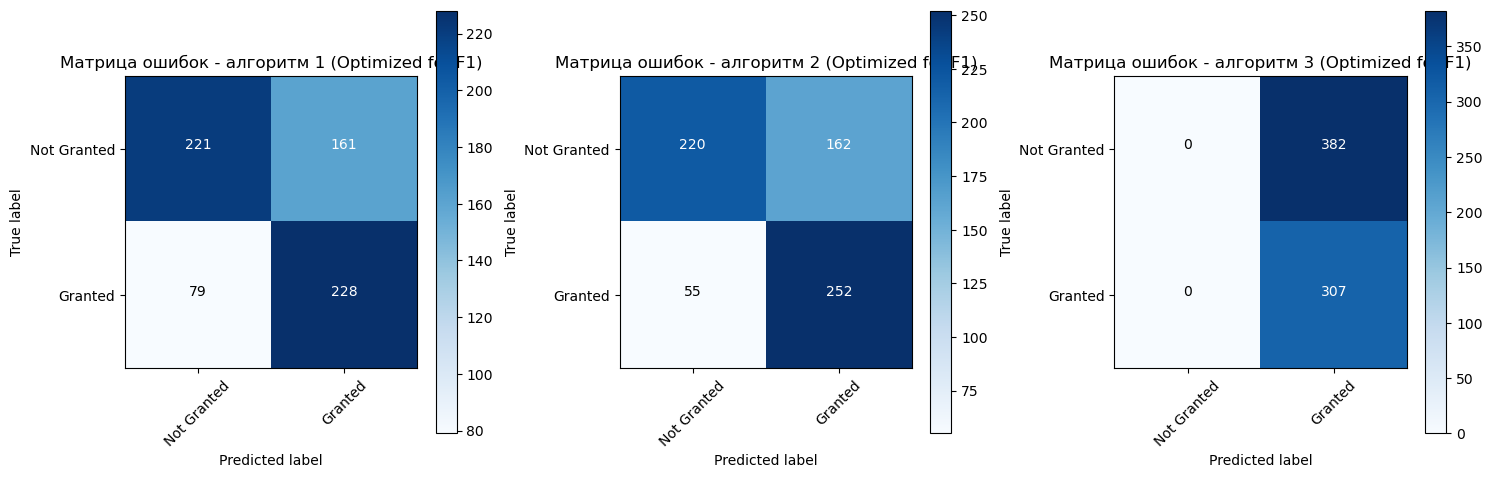

Лучшие пороги F1: {'Algorithm 1': 0.36, 'Algorithm 2': 0.32, 'Algorithm 3': 0}
Лучшие F1: {'Algorithm 1': 0.6551724137931035, 'Algorithm 2': 0.6990291262135923, 'Algorithm 3': 0}


In [148]:
def calculate_f1_metrics(probs, target, threshold):
    predictions = (probs >= threshold).astype(int)
    accuracy = accuracy_score(target, predictions)
    f1 = f1_score(target, predictions)
    return accuracy, f1

best_thresholds_f1 = {}
best_f1_scores = {}

for i, probs_column in enumerate(['pred1_probs', 'pred2_probs', 'pred3_probs'], start=1):
    max_f1 = 0
    best_thresh = 0
    
    for threshold in thresholds:
        accuracy, f1 = calculate_f1_metrics(data[probs_column], data['target'], threshold)
        
        if accuracy >= 0.65 and f1 > max_f1:
            max_f1 = f1
            best_thresh = threshold
    
    best_thresholds_f1[f'Algorithm {i}'] = best_thresh
    best_f1_scores[f'Algorithm {i}'] = max_f1

optimal_f1_predictions_1 = (data['pred1_probs'] >= best_thresholds_f1['Algorithm 1']).astype(int)
optimal_f1_predictions_2 = (data['pred2_probs'] >= best_thresholds_f1['Algorithm 2']).astype(int)
optimal_f1_predictions_3 = (data['pred3_probs'] >= best_thresholds_f1['Algorithm 3']).astype(int)

cm_optimal_f1_pred1 = confusion_matrix(data['target'], optimal_f1_predictions_1)
cm_optimal_f1_pred2 = confusion_matrix(data['target'], optimal_f1_predictions_2)
cm_optimal_f1_pred3 = confusion_matrix(data['target'], optimal_f1_predictions_3)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_confusion_matrix(cm_optimal_f1_pred1, classes=['Not Granted', 'Granted'], title='Матрица ошибок - алгоритм 1 (Optimized for F1)')

plt.subplot(1, 3, 2)
plot_confusion_matrix(cm_optimal_f1_pred2, classes=['Not Granted', 'Granted'], title='Матрица ошибок - алгоритм 2 (Optimized for F1)')

plt.subplot(1, 3, 3)
plot_confusion_matrix(cm_optimal_f1_pred3, classes=['Not Granted', 'Granted'], title='Матрица ошибок - алгоритм 3 (Optimized for F1)')

plt.show()

best_thresholds_f1, best_f1_scores

print(f'Лучшие пороги F1: {best_thresholds_f1}')
print(f'Лучшие F1: {best_f1_scores}')

**Вывод:**

Алгоритм 2 снова показал наилучший результат.

#### Кстати

В python есть удобная функция classification_report, которая выводит значения нескольких метрик.

In [149]:
from sklearn.metrics import classification_report

print(classification_report(data['target'],data['pred1_classes']))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       382
           1       0.69      0.44      0.53       307

    accuracy                           0.66       689
   macro avg       0.67      0.64      0.63       689
weighted avg       0.67      0.66      0.65       689



### Обучим свою модель для предсказания target.

**Задание 10. (0.5  баллов)** Отнормируйте признаки в задаче и обучите логистическую регрессию предсказывать target.

In [151]:
X = data.drop(columns=['target', 'pred1_probs', 'pred1_classes', 'pred2_probs', 'pred2_classes', 'pred3_probs', 'pred3_classes'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)

report = classification_report(y_test, y_pred)

print(f'Отчет о классификации:')
print()
print(report)

Отчет о классификации:

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       124
           1       0.79      0.94      0.86        83

    accuracy                           0.87       207
   macro avg       0.87      0.89      0.87       207
weighted avg       0.89      0.87      0.88       207



**Задание 11. (0.5  баллов)** Подберите порог для перевода предсказания в классы, чтобы максимизировать:
    а) точность 
    б) полноту 
    в) f1-score. 
Лучше ли логистическая регрессия справилась с задачей, чем три готовые модели, предсказания которых мы анализировали выше?

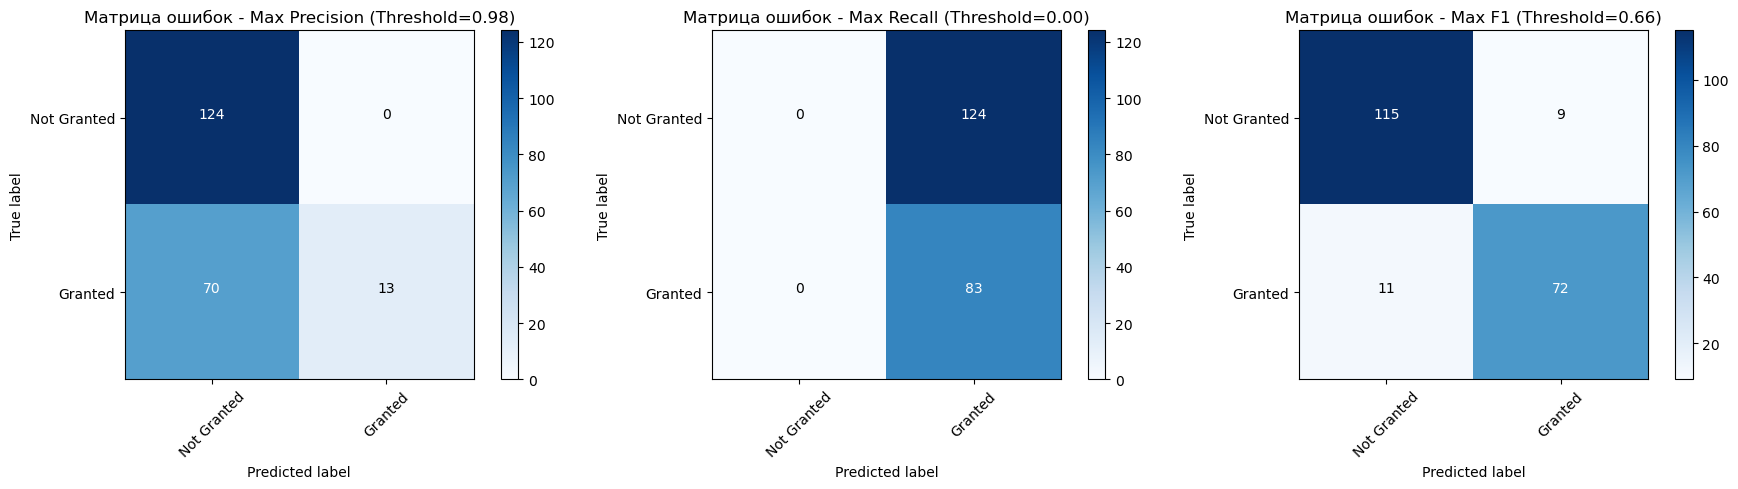

Лучшие пороги для перевода предсказания в классы: {'precision': {'score': 1.0, 'threshold': 0.98}, 'recall': {'score': 1.0, 'threshold': 0.0}, 'f1': {'score': 0.8780487804878048, 'threshold': 0.66}}


In [152]:
y_probs = log_reg.predict_proba(X_test_scaled)[:, 1]

thresholds = np.arange(0.0, 1.01, 0.01)

best_thresholds_log_reg = {}

best_metrics_log_reg = {
    'precision': {'score': 0, 'threshold': 0},
    'recall': {'score': 0, 'threshold': 0},
    'f1': {'score': 0, 'threshold': 0}
}

for threshold in thresholds:
    y_pred_thresh = (y_probs >= threshold).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    
    if precision > best_metrics_log_reg['precision']['score']:
        best_metrics_log_reg['precision']['score'] = precision
        best_metrics_log_reg['precision']['threshold'] = threshold

    if recall > best_metrics_log_reg['recall']['score']:
        best_metrics_log_reg['recall']['score'] = recall
        best_metrics_log_reg['recall']['threshold'] = threshold
    
    if f1 > best_metrics_log_reg['f1']['score']:
        best_metrics_log_reg['f1']['score'] = f1
        best_metrics_log_reg['f1']['threshold'] = threshold

best_threshold_precision = best_metrics_log_reg['precision']['threshold']
best_threshold_recall = best_metrics_log_reg['recall']['threshold']
best_threshold_f1 = best_metrics_log_reg['f1']['threshold']

y_pred_best_precision = (y_probs >= best_threshold_precision).astype(int)
y_pred_best_recall = (y_probs >= best_threshold_recall).astype(int)
y_pred_best_f1 = (y_probs >= best_threshold_f1).astype(int)

cm_best_precision = confusion_matrix(y_test, y_pred_best_precision)
cm_best_recall = confusion_matrix(y_test, y_pred_best_recall)
cm_best_f1 = confusion_matrix(y_test, y_pred_best_f1)

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plot_confusion_matrix(cm_best_precision, classes=['Not Granted', 'Granted'], title=f'Матрица ошибок - Max Precision (Threshold={best_threshold_precision:.2f})')

plt.subplot(1, 3, 2)
plot_confusion_matrix(cm_best_recall, classes=['Not Granted', 'Granted'], title=f'Матрица ошибок - Max Recall (Threshold={best_threshold_recall:.2f})')

plt.subplot(1, 3, 3)
plot_confusion_matrix(cm_best_f1, classes=['Not Granted', 'Granted'], title=f'Матрица ошибок - Max F1 (Threshold={best_threshold_f1:.2f})')

plt.show()

print(f'Лучшие пороги для перевода предсказания в классы: {best_metrics_log_reg}')

**ВЫВОД:**

Логистическая регрессия продемонстрировала высокую гибкость и возможность оптимизации для конкретных метрик (F1-score=0.878).